In [1]:
import numpy as np
import scipy
from scipy.linalg import expm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
import pandas as pd

def SSDP_DDoS(training_size, test_size, n, PLOT_DATA=True):
    class_labels = [r'BENING', r'DrDoS_SSDP']
    
    data = pd.read_csv('DrDoS_SSDP_features_removed.csv', skiprows=[i for i in range(1,141550)], skipfooter=141547, engine="python")
    x = StandardScaler().fit_transform(np.array(data.drop(columns=['Label'])))
    y = np.array(data['Label'].astype('category').cat.codes.astype(int))
    
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=109)
   
    pca = PCA(n_components=n).fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
   
    samples = np.append(X_train, X_test, axis=0)
    minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
    X_train = minmax_scale.transform(X_train)
    X_test = minmax_scale.transform(X_test)

    training_input = {key: (X_train[Y_train == k, :])[:training_size] for k, key in enumerate(class_labels)}
    test_input = {key: (X_test[Y_test == k, :])[:test_size] for k, key in enumerate(class_labels)}
    
    if PLOT_DATA:
        for k in range(0, 2):
            x_axis_data = X_train[Y_train == k, 0][:training_size]
            y_axis_data = X_train[Y_train == k, 1][:training_size]
            label = 'DDoS' if k == 1 else 'Benign'
            plt.scatter(x_axis_data, y_axis_data, label=label)

        plt.title("DDoS_SSDP Dataset (Dimensionality Reduced With PCA)")
        plt.legend()
        plt.show()
        

    return X_train, training_input, test_input, class_labels

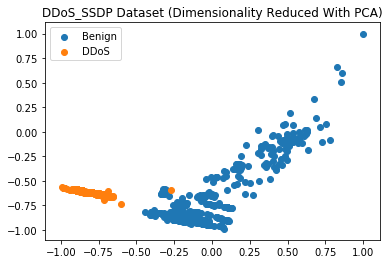

{'BENING': 0, 'DrDoS_SSDP': 1}


In [3]:
from qiskit.aqua.utils import split_dataset_to_data_and_labels

n = 2 # How many features to use (dimensionality)
training_dataset_size = 1033
testing_dataset_size = 443

sample_Total, training_input, test_input, class_labels = SSDP_DDoS(training_dataset_size, testing_dataset_size, n)

datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)

In [4]:
%load_ext memory_profiler

In [5]:
from qiskit import BasicAer
from qiskit.ml.datasets import *
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM

seed = 10598


feature_map =  ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_input, test_input, datapoints[0])

backend = BasicAer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

In [6]:
%%time
%memit result2 = qsvm.run(quantum_instance)

peak memory: 5874.83 MiB, increment: 5528.37 MiB
CPU times: user 2d 2h 49min 10s, sys: 2h 16min 24s, total: 2d 5h 5min 34s
Wall time: 2d 6h 49min 41s


In [7]:
print("ground truth:    {}".format(datapoints[1]))
print("prediction:      {}".format(result2['predicted_labels']))
print("predicted class: {}".format(result2['predicted_classes']))
print("accuracy:        {}".format(result2['testing_accuracy']))

ground truth:    [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1

In [8]:
 colours_prediction = {"correct": "#00A0B0", "incorrect": "#CC333F"}
markers = ["o", "v"]


def plot_points_prediction(x, y, p, title):
    c = {0: [], 1: [], 2: []}
    x_ = {0: [], 1: [], 2: []}

    for i in range(885):
        x_[y[i]].append(x[i])
        if p[i] == y[i]:
            c[y[i]].append(colours_prediction["correct"])
        else:
            c[y[i]].append(colours_prediction["incorrect"])
    fig = plt.figure(figsize=(5,5), dpi=100) 
    for i in range(2):
        x_class = np.array(x_[i])
        plt.scatter(x_class[:, 0], x_class[:, 1], c=c[i], marker=markers[i])
        
    plt.xlabel("Feature 1", fontsize=11)
    plt.ylabel("Feature 2", fontsize=11)
    plt.title("Predictions from {} model".format(title))
    plt.grid()

    ax = plt.gca()
    ax.set_aspect(1)
    c_transparent = "#00000000"

    custom_lines = [
        Patch(
            facecolor=colours_prediction["correct"],
            edgecolor=c_transparent, label="Correct"
        ),
        Patch(
            facecolor=colours_prediction["incorrect"],
            edgecolor=c_transparent, label="Incorrect"
        ),
        Line2D([0], [0], marker=markers[0], color=c_transparent, label="Class 0",
               markerfacecolor="black", markersize=10),
        Line2D([0], [0], marker=markers[1], color=c_transparent, label="Class 1",
               markerfacecolor="black", markersize=10),
    ]

    ax.legend(handles=custom_lines)
    return fig

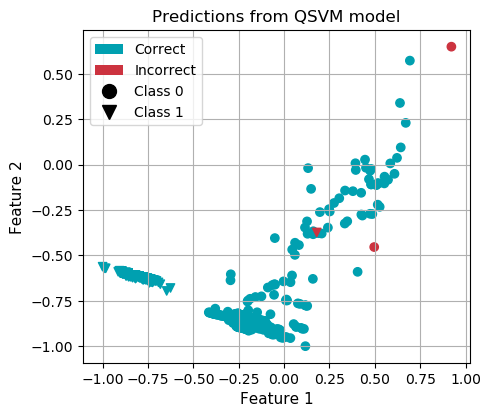

In [9]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

data = list(test_input.items())

lk = np.vstack((pd.DataFrame(data).drop(0, axis=1)[1][0],pd.DataFrame(data).drop(0, axis=1)[1][1]))
fig = plot_points_prediction(lk, datapoints[1], result2['predicted_labels'], "QSVM")
fig.savefig('PREDICQSVM.pdf')

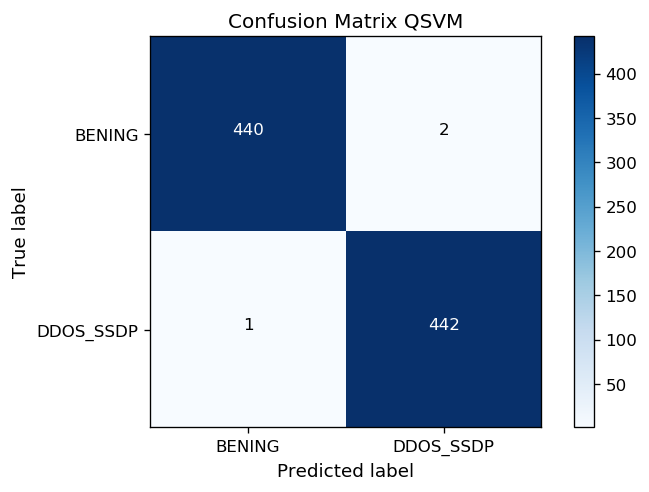

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(datapoints[1], result2['predicted_labels'])

import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    fig = plt.figure(figsize=(6, 4), dpi=120)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label', fontsize=11)
    plt.xlabel('Predicted label', fontsize=11)
    plt.show()
    return fig
fig = plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['BENING', 'DDOS_SSDP'],
                      title        = "Confusion Matrix QSVM")
fig.savefig('CONFUSQSVM.pdf')

In [11]:
from sklearn.metrics import classification_report, recall_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, make_scorer

#Metrics
classification = classification_report(datapoints[1], result2['predicted_labels'])
confusion = confusion_matrix(datapoints[1], result2['predicted_labels'])
    
    # Accuracy
accuracy = round(accuracy_score(datapoints[1], result2['predicted_labels']),5)
    
    # Recall
recall = round(recall_score(datapoints[1], result2['predicted_labels'], average='macro')*100,5)
    
    # Precision
precision = round(precision_score(datapoints[1], result2['predicted_labels'], average='weighted')*100,5)
    
    # F1
f1 = round(f1_score(datapoints[1], result2['predicted_labels'], average='weighted')*100,5)

In [12]:
print(accuracy)
print(recall)
print(precision)
print(f1)
print(1-accuracy)

0.99661
99.66089
99.66127
99.66102
0.003390000000000004
